In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('0_starting_data.csv')
print(df.shape, "\n")
print(df.dtypes, "\n")
df

(2507, 9) 

reviewID           object
sentenceID         object
sentenceText       object
processedText      object
sentimentScore    float64
target             object
category           object
part                int64
polarity           object
dtype: object 



,reviewID,sentenceID,sentenceText,processedText,sentimentScore,target,category,part,polarity
0,1004293,1004293:0,Judging from previous posts this used to be a ...,judging from previous posts this used to be a ...,0.2382,place,restaurant general,1,negative
1,1004293,1004293:1,"We, there were four of us, arrived at noon - t...",we there were four of us arrived at noon the p...,-0.4576,staff,service general,1,negative
2,1004293,1004293:2,"They never brought us complimentary noodles, i...",they never brought us complimentary noodles ig...,-0.5727,NaN,service general,1,negative
3,1004293,1004293:3,The food was lousy - too sweet or too salty an...,the food was lousy too sweet or too salty and ...,-0.1280,food,food quality,1,negative
4,1004293,1004293:3,The food was lousy - too sweet or too salty an...,the food was lousy too sweet or too salty and ...,-0.1280,portions,food style options,1,negative
...,...,...,...,...,...,...,...,...,...
2502,FF#10,FF#10:8,The waitress came to check in on us every few ...,the waitress came to check in on us every few ...,-0.0422,waitress,service general,10,negative
2503,FF#10,FF#10:9,I couldn't ignore the fact that she reach over...,i couldn t ignore the fact that she reach over...,0.7851,NaN,service general,10,negative
2504,FF#10,FF#10:10,She then put the check down without asking if ...,she then put the check down without asking if ...,0.0000,NaN,service general,10,negative
2505,FF#10,FF#10:11,"I wish I could like this place more, and I wis...",i wish i could like this place more and i wish...,0.7845,place,restaurant general,10,negative


In [66]:
print('****** Checking for NULL values: ******\n')
print(df.isnull().sum())

****** Checking for NULL values: ******

reviewID            0
sentenceID          0
sentenceText        0
processedText       0
sentimentScore      0
target            627
category            0
part                0
polarity            0
dtype: int64


In [67]:
# see how many rows we have per part
df['part'].value_counts()

part
10    420
9     267
4     252
3     246
1     231
7     227
5     225
2     224
8     210
6     205
Name: count, dtype: int64

In [68]:
# nan_polarity_category_target = df[df["polarity"].isna() & df["target"].isna() & df["category"].isna()]

# part_counts = nan_polarity_category_target['part'].value_counts()
# print(part_counts)

In [77]:
# make sure we don't have any missing target variable, which is `polarity`
len(df[df["polarity"].isna()])

0

In [70]:
# vader library scores 0.0 when it finds a `neutral` sentiment
df[df["sentimentScore"] == 0.0]

,reviewID,sentenceID,sentenceText,processedText,sentimentScore,target,category,part,polarity
16,1016296,1016296:1,Ive asked a cart attendant for a lotus leaf wr...,ive asked a cart attendant for a lotus leaf wr...,0.0,cart attendant,service general,1,negative
17,1016296,1016296:2,I had to ask her three times before she finall...,i had to ask her three times before she finall...,0.0,NaN,service general,1,negative
22,1016296,1016296:5,I/we will never go back to this place again.,i we will never go back to this place again,0.0,place,restaurant general,1,negative
24,1028246,1028246:1,"Service was devine, oysters where a sensual as...",service was devine oysters where a sensual as ...,0.0,service,service general,1,positive
25,1028246,1028246:1,"Service was devine, oysters where a sensual as...",service was devine oysters where a sensual as ...,0.0,oysters,food quality,1,positive
...,...,...,...,...,...,...,...,...,...
2475,WE#1,WE#1:0,Expensive,expensive,0.0,NaN,restaurant prices,10,negative
2489,FF#6,FF#6:10,The three of us standing in front of her shoul...,the three of us standing in front of her shoul...,0.0,NaN,service general,10,negative
2498,FF#10,FF#10:5,"I was there for brunch recently, and we were t...",i was there for brunch recently and we were ta...,0.0,waitress,service general,10,negative
2499,FF#10,FF#10:5,"I was there for brunch recently, and we were t...",i was there for brunch recently and we were ta...,0.0,waiter,service general,10,negative


In [71]:
def unique_value(df):
    col = df.columns
    for c in col:
        print(f'\tcolumn: "{c}":')
        print(df[c].unique()[:6])
        print(f'Number of unique values: {df[c].nunique()} (NaNs are not counted)')
        print(f"{'='*40}")

print('****** Checking on unique values per column: ******\n')
unique_value(df)

****** Checking on unique values per column: ******

	column: "reviewID":
['1004293' '1014458' '1016296' '1028246' '1032695' '1041457']
Number of unique values: 349 (NaNs are not counted)
	column: "sentenceID":
['1004293:0' '1004293:1' '1004293:2' '1004293:3' '1004293:4' '1004293:5']
Number of unique values: 1708 (NaNs are not counted)
	column: "sentenceText":
['Judging from previous posts this used to be a good place, but not any longer.'
 'We, there were four of us, arrived at noon - the place was empty - and the staff acted like we were imposing on them and they were very rude.'
 'They never brought us complimentary noodles, ignored repeated requests for sugar, and threw our dishes on the table.'
 'The food was lousy - too sweet or too salty and the portions tiny.'
 'After all that, they complained to me about the small tip.'
 'Avoid this place!']
Number of unique values: 1703 (NaNs are not counted)
	column: "processedText":
['judging from previous posts this used to be a good place

In [73]:
# Calculate word lengths
df['category_word_length'] = df['category'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)
df['target_word_length'] = df['target'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)
df['processedText_word_length'] = df['processedText'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)

# 2. Calculate mean word lengths
mean_category_word_length = df['category_word_length'].mean()
mean_target_word_length = df['target_word_length'].mean()
mean_processedText_word_length = df['processedText_word_length'].mean()

# Display mean word lengths
print("Mean word length in 'category':", mean_category_word_length)
print("Mean word length in 'target':", mean_target_word_length)
print("Mean word length in 'processedText':", mean_processedText_word_length)

Mean word length in 'category': 2.0674112485041882
Mean word length in 'target': 1.0981252493019544
Mean word length in 'processedText': 14.432788193059434


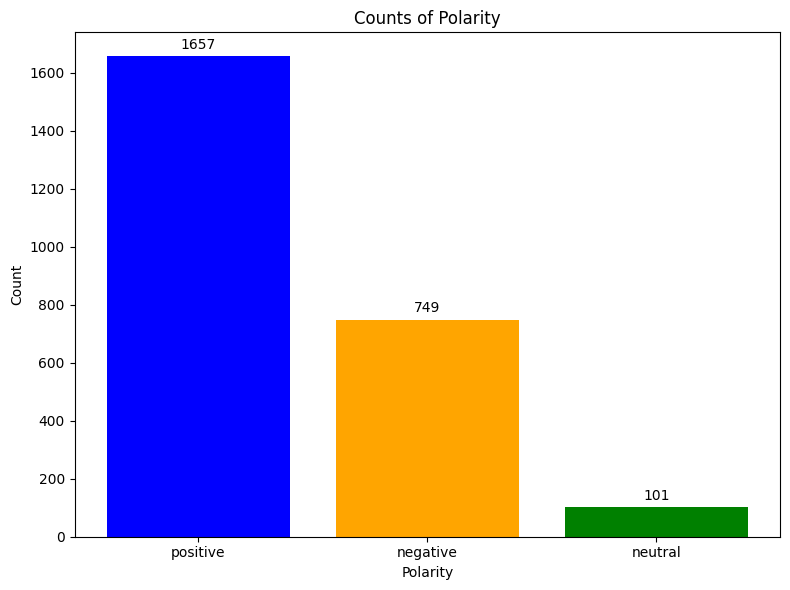

In [74]:
# Plot polarity counts in the dataset
polarity_counts = df['polarity'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(polarity_counts.index, polarity_counts.values, color=['blue', 'orange', 'green'])

for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_title('Counts of Polarity')
ax.set_xlabel('Polarity')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()